# 1) Bibliotecas

In [37]:
import pandas as pd
#-----------------------------------------------------
#Modelos
from sklearn import tree as tr
from sklearn import linear_model as lm
from sklearn import preprocessing as pp
from sklearn.ensemble import RandomForestRegressor
#-----------------------------------------------------
from sklearn.model_selection import GridSearchCV
#-----------------------------------------------------
from sklearn import metrics as mt
#-----------------------------------------------------
import matplotlib.pyplot as plt

# 2) Conjunto de dados

In [2]:
x_train = pd.read_csv('datasets/regressao/X_training.csv')
y_train = pd.read_csv('datasets/regressao/y_training.csv')
#----------------------------------------------------------------------
x_val = pd.read_csv('datasets/regressao/X_validation.csv')
y_val = pd.read_csv('datasets/regressao/y_val.csv')
#----------------------------------------------------------------------
x_test = pd.read_csv('datasets/regressao/X_test.csv')
y_test = pd.read_csv('datasets/regressao/y_test.csv')
#----------------------------------------------------------------------
total = x_train.shape[0] + x_val.shape[0] + x_test.shape[0]
#----------------------------------------------------------------------
print('Treino: {} instâncias / {}%'.format(x_train.shape[0], round(100*(x_train.shape[0]/total))))
print('Validação: {} instâncias / {}%'.format(x_val.shape[0], round(100*(x_val.shape[0]/total))))
print('Teste: {} instâncias  / {}%'.format(x_test.shape[0], round(100*(x_test.shape[0]/total))))
print('Total: {} instâncias'.format(total))

Treino: 10547 instâncias / 56%
Validação: 4521 instâncias / 24%
Teste: 3767 instâncias  / 20%
Total: 18835 instâncias


In [3]:
x_train.columns

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence'],
      dtype='object')

In [8]:
y_train.columns

Index(['song_popularity'], dtype='object')

# 3) Linear Regression

In [12]:
lr_model = lr.LinearRegression()
lr_model.fit(x_train, y_train)

y_pred_lr1 = lr_model.predict(x_train)
y_pred_lr2 = lr_model.predict(x_val)
y_pred_lr3 = lr_model.predict(x_test)

lr_model.intercept_, lr_model.coef_

(array([53.53224887]),
 array([[ -0.20046868,  -3.65696235,  13.56830825, -10.08825907,
          -9.92988105,  -0.86974806,  -4.85538987,   2.49422937,
          -0.22283834,  -1.77163857,  -0.39798578,   7.31483515,
          -9.46824939]]))

In [35]:
#Métricas de performance
#Previsão sobre x_train
lr_r2score_1 = round(mt.r2_score(y_train, y_pred_lr1),2)
lr_mse_1     = round(mt.mean_squared_error(y_train, y_pred_lr1),2)
lr_rmse_1    = round(mt.root_mean_squared_error(y_train, y_pred_lr1),2)
lr_mae_1     = round(mt.mean_absolute_error(y_train, y_pred_lr1),2) 
lr_mape_1    = round(mt.mean_absolute_percentage_error(y_train, y_pred_lr1),2)
#----------------------------------------------------------------------------
#Previsão sobre x_val
lr_r2score_2 = round(mt.r2_score(y_val, y_pred_lr2),2)
lr_mse_2     = round(mt.mean_squared_error(y_val, y_pred_lr2),2)
lr_rmse_2    = round(mt.root_mean_squared_error(y_val, y_pred_lr2),2)
lr_mae_2     = round(mt.mean_absolute_error(y_val, y_pred_lr2),2) 
lr_mape_2    = round(mt.mean_absolute_percentage_error(y_val, y_pred_lr2),2)
#----------------------------------------------------------------------------
#Previsão sobre x_test
lr_r2score_3 = round(mt.r2_score(y_test, y_pred_lr3),2)
lr_mse_3     = round(mt.mean_squared_error(y_test, y_pred_lr3),2)
lr_rmse_3    = round(mt.root_mean_squared_error(y_test, y_pred_lr3),2)
lr_mae_3     = round(mt.mean_absolute_error(y_test, y_pred_lr3),2)
lr_mape_3    = round(mt.mean_absolute_percentage_error(y_test, y_pred_lr3),2)
#----------------------------------------------------------------------------
df1 = pd.DataFrame.from_dict({'Previsão': ['x_train', 'x_val', 'x_test'],
                              'R2_Score': [lr_r2score_1, lr_r2score_2, lr_r2score_3],
                              'MSE': [lr_mse_1, lr_mse_2, lr_mse_3],
                              'RSME':   [lr_rmse_1, lr_rmse_2, lr_rmse_3],
                              'MAE': [lr_mae_1, lr_mae_2, lr_mae_3],
                              'MAPE':  [lr_mape_1, lr_mape_2, lr_mape_3]})
#-----------------------------------------------------------------------------------------------------
df1

,Previsão,R2_Score,MSE,RSME,MAE,MAPE
0,x_train,0.05,456.00,21.35,17.00,8.65
1,x_val,0.04,458.45,21.41,17.04,8.68
2,x_test,0.05,461.43,21.48,17.13,8.52


# 4) Decision Tree Regresssor

In [36]:
dt_regressor = tr.DecisionTreeRegressor(random_state = 42)
dt_regressor.fit(x_train, y_train)
y_pred_dtr1 = dt_regressor.predict(x_train)
y_pred_dtr2 = dt_regressor.predict(x_val)
y_pred_dtr3 = dt_regressor.predict(x_test)
#----------------------------------------------------------------------------
#Previsão sobre x_train
dtr_r2score_1 = round(mt.r2_score(y_train, y_pred_dtr1),2)
dtr_mse_1     = round(mt.mean_squared_error(y_train, y_pred_dtr1),2)
dtr_rmse_1    = round(mt.root_mean_squared_error(y_train, y_pred_dtr1),2)
dtr_mae_1     = round(mt.mean_absolute_error(y_train, y_pred_dtr1),2) 
dtr_mape_1    = round(mt.mean_absolute_percentage_error(y_train, y_pred_dtr1),2)
#----------------------------------------------------------------------------
#Previsão sobre x_val
dtr_r2score_2 = round(mt.r2_score(y_val, y_pred_dtr2),2)
dtr_mse_2     = round(mt.mean_squared_error(y_val, y_pred_dtr2),2)
dtr_rmse_2    = round(mt.root_mean_squared_error(y_val, y_pred_dtr2),2)
dtr_mae_2     = round(mt.mean_absolute_error(y_val, y_pred_dtr2),2) 
dtr_mape_2    = round(mt.mean_absolute_percentage_error(y_val, y_pred_dtr2),2)
#----------------------------------------------------------------------------
#Previsão sobre x_test
dtr_r2score_3 = round(mt.r2_score(y_test, y_pred_dtr3),2)
dtr_mse_3     = round(mt.mean_squared_error(y_test, y_pred_dtr3),2)
dtr_rmse_3    = round(mt.root_mean_squared_error(y_test, y_pred_dtr3),2)
dtr_mae_3     = round(mt.mean_absolute_error(y_test, y_pred_dtr3),2) 
dtr_mape_3    = round(mt.mean_absolute_percentage_error(y_test, y_pred_dtr3),2)
#----------------------------------------------------------------------------
df2 = pd.DataFrame.from_dict({'Previsão': ['x_train', 'x_val', 'x_test'],
                              'R2_Score': [dtr_r2score_1, dtr_r2score_2, dtr_r2score_3],
                              'MSE': [dtr_mse_1, dtr_mse_2, dtr_mse_3],
                              'RSME':   [dtr_rmse_1, dtr_rmse_2, dtr_rmse_3],
                              'MAE': [dtr_mae_1, dtr_mae_2, dtr_mae_3],
                              'MAPE':  [dtr_mape_1, dtr_mape_2, dtr_mape_3]})
#-----------------------------------------------------------------------------------------------------
df2

,Previsão,R2_Score,MSE,RSME,MAE,MAPE
0,x_train,0.99,3.94,1.99,0.21,0.08
1,x_val,-0.32,631.85,25.14,17.33,7.25
2,x_test,-0.27,617.56,24.85,17.19,6.40


## 4.1) Otimização Decision Tree Regressor (parâmetro max_depth)

In [23]:
metricas = []

for max_depth in range(2,25,1):
    
    dt_regressor2 = tr.DecisionTreeRegressor(max_depth = max_depth)
    dt_regressor2.fit(x_train, y_train)
    y_pred_dtr4 = dt_regressor2.predict(x_test)
    dtr_r2score_4 = round(mt.r2_score(y_test, y_pred_dtr4),2)
    dtr_mse_4     = round(mt.mean_squared_error(y_test, y_pred_dtr4),2)
    dtr_rmse_4    = round(mt.root_mean_squared_error(y_test, y_pred_dtr4),2)
    dtr_mae_4     = round(mt.mean_absolute_error(y_test, y_pred_dtr4),2) 
    dtr_mape_4    = round(mt.mean_absolute_percentage_error(y_test, y_pred_dtr4),2)

    metricas.append([max_depth, dtr_r2score_4, dtr_mse_4, dtr_rmse_4, dtr_mae_4, dtr_mape_4])

In [26]:
df3 = pd.DataFrame(metricas, columns = ['max_depth', 'R2', 'MSE', 'RMSE', 'MAE', 'MAPE'])
df3

,max_depth,R2,MSE,RMSE,MAE,MAPE
0,2,0.04,467.09,21.61,17.23,8.43
1,3,0.06,457.96,21.40,17.08,8.29
2,4,0.07,452.08,21.26,16.99,8.23
3,5,0.07,451.76,21.25,17.01,7.83
4,6,0.08,448.70,21.18,16.89,7.61
5,7,0.08,449.27,21.20,16.85,7.45
6,8,0.07,451.92,21.26,16.82,7.38
7,9,0.06,458.77,21.42,16.85,7.23
8,10,0.05,464.03,21.54,16.72,6.96
9,11,0.03,473.19,21.75,16.70,6.84


## 4.2) Otimização Decision Tree Regressor (parâmetro min_samples_split)

In [25]:
metricas2 = []

for min_samples_split in range(2,25,1):
    
    dt_regressor3 = tr.DecisionTreeRegressor(max_depth = 6, min_samples_split = min_samples_split)
    dt_regressor3.fit(x_train, y_train)
    y_pred_dtr5 = dt_regressor3.predict(x_test)
    dtr_r2score_5 = round(mt.r2_score(y_test, y_pred_dtr5),2)
    dtr_mse_5     = round(mt.mean_squared_error(y_test, y_pred_dtr5),2)
    dtr_rmse_5    = round(mt.root_mean_squared_error(y_test, y_pred_dtr5),2)
    dtr_mae_5     = round(mt.mean_absolute_error(y_test, y_pred_dtr5),2) 
    dtr_mape_5    = round(mt.mean_absolute_percentage_error(y_test, y_pred_dtr5),2)

    metricas2.append([min_samples_split, dtr_r2score_5, dtr_mse_5, dtr_rmse_5, dtr_mae_5, dtr_mape_5])  

In [27]:
df4 = pd.DataFrame(metricas2, columns = ['min_samples_split', 'R2', 'MSE', 'RMSE', 'MAE', 'MAPE'])
df4

,min_samples_split,R2,MSE,RMSE,MAE,MAPE
0,2,0.08,448.7,21.18,16.89,7.61
1,3,0.08,448.7,21.18,16.89,7.61
2,4,0.08,448.7,21.18,16.89,7.61
3,5,0.08,448.7,21.18,16.89,7.61
4,6,0.08,448.7,21.18,16.89,7.61
5,7,0.08,448.7,21.18,16.89,7.61
6,8,0.08,448.7,21.18,16.89,7.61
7,9,0.08,448.7,21.18,16.89,7.61
8,10,0.08,448.7,21.18,16.89,7.61
9,11,0.08,448.7,21.18,16.89,7.61


## 4.3) Otimização Decision Tree Regressor (parâmetro max_features)

In [34]:
metricas3 = []

for max_features in range(1, 14, 1):
    
    dt_regressor4 = tr.DecisionTreeRegressor(max_depth = 6, 
                                             max_features = max_features)
    dt_regressor4.fit(x_train, y_train)
    y_pred_dtr6 = dt_regressor4.predict(x_test)
    dtr_r2score_6 = round(mt.r2_score(y_test, y_pred_dtr6),2)
    dtr_mse_6     = round(mt.mean_squared_error(y_test, y_pred_dtr6),2)
    dtr_rmse_6    = round(mt.root_mean_squared_error(y_test, y_pred_dtr6),2)
    dtr_mae_6     = round(mt.mean_absolute_error(y_test, y_pred_dtr6),2) 
    dtr_mape_6    = round(mt.mean_absolute_percentage_error(y_test, y_pred_dtr6),2)

    metricas3.append([max_features, dtr_r2score_6, dtr_mse_6, dtr_rmse_6, dtr_mae_6, dtr_mape_6])

In [35]:
df5 = pd.DataFrame(metricas3, columns = ['max_features', 'R2', 'MSE', 'RMSE', 'MAE', 'MAPE'])
df5

,max_features,R2,MSE,RMSE,MAE,MAPE
0,1,0.02,478.49,21.87,17.49,8.61
1,2,0.06,457.44,21.39,17.02,8.13
2,3,0.06,456.36,21.36,16.94,8.11
3,4,0.06,455.86,21.35,17.03,8.24
4,5,0.07,452.40,21.27,16.93,8.02
5,6,0.07,453.07,21.29,16.95,7.83
6,7,0.07,454.37,21.32,16.95,8.02
7,8,0.09,444.77,21.09,16.77,7.62
8,9,0.07,450.79,21.23,16.87,8.14
9,10,0.08,449.35,21.20,16.91,8.01


## 4.4) Visualizando os erros (max_depth = 6 e max_features variável)

Text(0, 0.5, 'MAE')

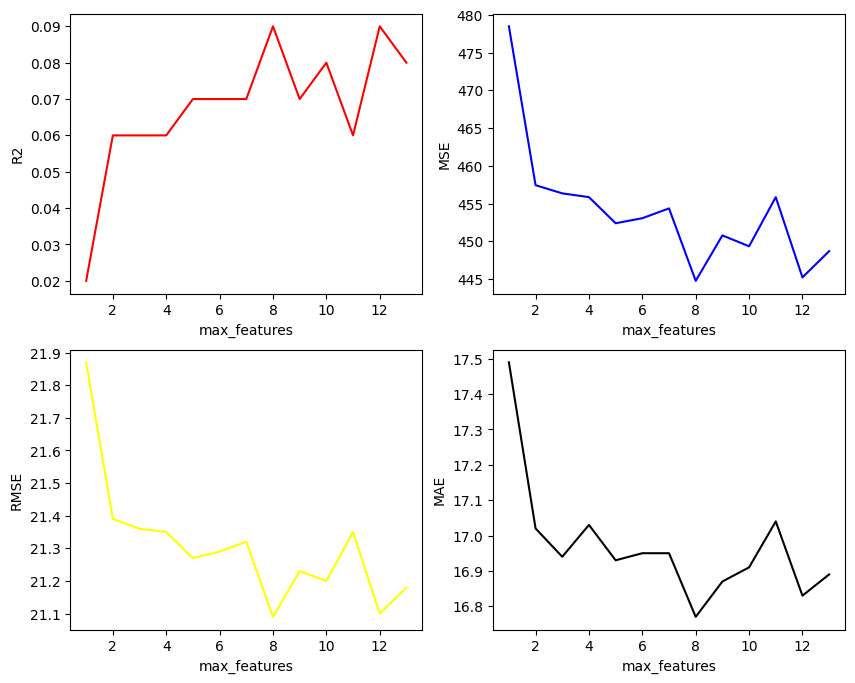

In [43]:
fig, axs = plt.subplots(2,2, figsize = (10,8))

axs[0,0].plot(df5['max_features'], df5['R2'], label = 'R2', color = 'red')
axs[0,0].set_xlabel('max_features')
axs[0,0].set_ylabel('R2')
#----------------------------------------------------------------------------
axs[0,1].plot(df5['max_features'], df5['MSE'], label = 'MSE', color = 'blue')
axs[0,1].set_xlabel('max_features')
axs[0,1].set_ylabel('MSE')
#----------------------------------------------------------------------------
axs[1,0].plot(df5['max_features'], df5['RMSE'], label = 'RMSE', color = 'yellow')
axs[1,0].set_xlabel('max_features')
axs[1,0].set_ylabel('RMSE')
#----------------------------------------------------------------------------
axs[1,1].plot(df5['max_features'], df5['MAE'], label = 'MAE', color = 'black')
axs[1,1].set_xlabel('max_features')
axs[1,1].set_ylabel('MAE')

## 4.5) Otimizando Decision Tree Regressor com GridSearchCV

In [49]:
param_grid = [{'max_depth': [3, 5, 7, 9, 11, 13],
               'min_samples_split': [10, 20, 30],
               'max_features': [2, 4, 6, 8, 10],
               'min_samples_leaf': [1, 10, 20]
              }]

dt_regressor5 = tr.DecisionTreeRegressor(random_state = 42)
grid_search1 = GridSearchCV(estimator = dt_regressor5,
                          param_grid = param_grid,
                          cv = 5,
                          n_jobs = -1,
                          verbose = 0,
                          scoring = ['r2', 
                                   'neg_mean_squared_error', 
                                   'neg_root_mean_squared_error',
                                   'neg_mean_absolute_error',
                                   'neg_mean_absolute_percentage_error'],
                          refit = 'r2',
                          return_train_score = True)
grid_search1.fit(x_train, y_train)
best_dt_regressor5 = grid_search1.best_estimator_
best_dt_regressor5

DecisionTreeRegressor(max_depth=7, max_features=8, min_samples_leaf=10,
                      min_samples_split=10, random_state=42)

In [50]:
best_dt_regressor5.fit(x_train, y_train)
y_pred_dtr4 = best_dt_regressor5.predict(x_test)
#----------------------------------------------------------------------------
#Previsão sobre x_test
dtr_r2score_4 = round(mt.r2_score(y_test, y_pred_dtr4),2)
dtr_mse_4     = round(mt.mean_squared_error(y_test, y_pred_dtr4),2)
dtr_rmse_4    = round(mt.root_mean_squared_error(y_test, y_pred_dtr4),2)
dtr_mae_4     = round(mt.mean_absolute_error(y_test, y_pred_dtr4),2) 
dtr_mape_4    = round(mt.mean_absolute_percentage_error(y_test, y_pred_dtr4),2)

dtr_r2score_4, dtr_mse_4, dtr_rmse_4, dtr_mae_4, dtr_mape_4

(0.08, 446.36, 21.13, 16.84, 7.74)

# 5) Random Forest Regressor

In [37]:
rf_regressor = RandomForestRegressor(random_state = 42)
rf_regressor.fit(x_train, y_train.values.ravel())

y_pred_rf1 = rf_regressor.predict(x_train)
y_pred_rf2 = rf_regressor.predict(x_val)
y_pred_rf3 = rf_regressor.predict(x_test)
#------------------------------------------------------------
#Previsão sobre x_train
rf_r2score_1 = round(mt.r2_score(y_train, y_pred_rf1),2)
rf_mse_1     = round(mt.mean_squared_error(y_train, y_pred_rf1),2)
rf_rmse_1    = round(mt.root_mean_squared_error(y_train, y_pred_rf1),2)
rf_mae_1     = round(mt.mean_absolute_error(y_train, y_pred_rf1),2) 
rf_mape_1    = round(mt.mean_absolute_percentage_error(y_train, y_pred_rf1),2)
#----------------------------------------------------------------------------
#Previsão sobre x_val
rf_r2score_2 = round(mt.r2_score(y_val, y_pred_rf2),2)
rf_mse_2     = round(mt.mean_squared_error(y_val, y_pred_rf2),2)
rf_rmse_2    = round(mt.root_mean_squared_error(y_val, y_pred_rf2),2)
rf_mae_2     = round(mt.mean_absolute_error(y_val, y_pred_rf2),2) 
rf_mape_2    = round(mt.mean_absolute_percentage_error(y_val, y_pred_rf2),2)
#----------------------------------------------------------------------------
#Previsão sobre x_test
rf_r2score_3 = round(mt.r2_score(y_test, y_pred_rf3),2)
rf_mse_3     = round(mt.mean_squared_error(y_test, y_pred_rf3),2)
rf_rmse_3    = round(mt.root_mean_squared_error(y_test, y_pred_rf3),2)
rf_mae_3     = round(mt.mean_absolute_error(y_test, y_pred_rf3),2) 
rf_mape_3    = round(mt.mean_absolute_percentage_error(y_test, y_pred_rf3),2)
#----------------------------------------------------------------------------
df6 = pd.DataFrame.from_dict({'Previsão': ['x_train', 'x_val', 'x_test'],
                              'R2_Score': [rf_r2score_1, rf_r2score_2, rf_r2score_3],
                              'MSE': [rf_mse_1, rf_mse_2, rf_mse_3],
                              'RSME':   [rf_rmse_1, rf_rmse_2, rf_rmse_3],
                              'MAE': [rf_mae_1, rf_mae_2, rf_mae_3],
                              'MAPE':  [rf_mape_1, rf_mape_2, rf_mape_3]})
#-----------------------------------------------------------------------------------------------------
df6

,Previsão,R2_Score,MSE,RSME,MAE,MAPE
0,x_train,0.90,46.41,6.81,4.87,2.55
1,x_val,0.33,317.83,17.83,13.02,7.06
2,x_test,0.35,315.46,17.76,13.02,6.51


## 5.1) Otimizando Random Forest Regressor com GridSearchCV

In [61]:
param_grid = [{'n_estimators': [3, 10, 30],
              'max_features': [2, 4, 6, 8]},
             {'bootstrap': [True], 
             'n_estimators': [3, 10],
             'max_features': [2, 3, 4]},
             ]

rf_regressor1 = RandomForestRegressor(random_state = 42)
grid_rfr = GridSearchCV(estimator = rf_regressor1,
                        param_grid = param_grid, 
                        n_jobs = -1,
                        verbose = 0,
                        cv = 5,  
                        scoring = ['r2', 
                                    'neg_mean_squared_error', 
                                    'neg_root_mean_squared_error',
                                    'neg_mean_absolute_error',
                                    'neg_mean_absolute_percentage_error'],
                        refit = 'r2',
                        return_train_score = True)
grid_rfr.fit(x_train, y_train.values.ravel())
best_model_rfr = grid_rfr.best_estimator_
best_model_rfr

RandomForestRegressor(max_features=2, n_estimators=30, random_state=42)

In [62]:
best_model_rfr.fit(x_train, y_train.values.ravel())
y_pred_rf4 = best_model_rfr.predict(x_test)
#----------------------------------------------------------------------------
#Previsão sobre x_test
rf_r2score_4 = round(mt.r2_score(y_test, y_pred_rf4),2)
rf_mse_4     = round(mt.mean_squared_error(y_test, y_pred_rf4),2)
rf_rmse_4    = round(mt.root_mean_squared_error(y_test, y_pred_rf4),2)
rf_mae_4     = round(mt.mean_absolute_error(y_test, y_pred_rf4),2) 
rf_mape_4    = round(mt.mean_absolute_percentage_error(y_test, y_pred_rf4),2)

rf_r2score_4, rf_mse_4, rf_rmse_4, rf_mae_4, rf_mape_4

(0.34, 322.68, 17.96, 13.18, 6.66)

# 6) Polinomial Regression

In [10]:
metrics1 = []

for degree in range(1,5,1):

    lr_model = lr.LinearRegression()   

    poly = pp.PolynomialFeatures(degree = degree, include_bias = False)
    x_poly_train = poly.fit_transform(x_train)
    
    #Ajuste do model
    lr_model.fit(x_poly_train, y_train)
    
    y_pred_poly1  = lr_model.predict(x_poly_train)

    pp_r2score_1 = round(mt.r2_score(y_train, y_pred_poly1),2)
    pp_mse_1     = round(mt.mean_squared_error(y_train, y_pred_poly1),2)
    pp_rmse_1    = round(mt.root_mean_squared_error(y_train, y_pred_poly1),2)
    pp_mae_1     = round(mt.mean_absolute_error(y_train, y_pred_poly1),2)
    pp_mape_1    = round(mt.mean_absolute_percentage_error(y_train, y_pred_poly1),2)

    metrics1.append([degree, pp_r2score_1, pp_mse_1, pp_rmse_1, pp_mae_1, pp_mape_1])

df7 = pd.DataFrame(metrics1, columns = ['Grau', 'R2_Score', 'MSE', 'RSME', 'MAE', 'MAPE'])
df7

,Grau,R2_Score,MSE,RSME,MAE,MAPE
0,1,0.05,456.00,21.35,17.00,8.65
1,2,0.09,432.99,20.81,16.46,8.35
2,3,0.15,404.20,20.10,15.88,7.80
3,4,0.33,318.38,17.84,13.61,5.91


In [13]:
metrics2 = []

for degree in range(1,5,1):

    lr_model = lr.LinearRegression()   

    poly = pp.PolynomialFeatures(degree = degree, include_bias = False)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_val   = poly.fit_transform(x_val)
    
    #Ajuste do model
    lr_model.fit(x_poly_train, y_train)
    
    y_pred_poly2  = lr_model.predict(x_poly_val)

    pp_r2score_2 = round(mt.r2_score(y_val, y_pred_poly2),2)
    pp_mse_2     = round(mt.mean_squared_error(y_val, y_pred_poly2),2)
    pp_rmse_2    = round(mt.root_mean_squared_error(y_val, y_pred_poly2),2)
    pp_mae_2     = round(mt.mean_absolute_error(y_val, y_pred_poly2),2)
    pp_mape_2    = round(mt.mean_absolute_percentage_error(y_val, y_pred_poly2),2)

    metrics2.append([degree, pp_r2score_2, pp_mse_2, pp_rmse_2, pp_mae_2, pp_mape_2])

df8 = pd.DataFrame(metrics2, columns = ['Grau', 'R2_Score', 'MSE', 'RSME', 'MAE', 'MAPE'])
df8

,Grau,R2_Score,MSE,RSME,MAE,MAPE
0,1,0.04,458.45,21.41,17.04,8.68
1,2,0.07,445.77,21.11,16.75,8.55
2,3,-0.05,500.33,22.37,17.09,8.68
3,4,-102.92,49624.74,222.77,36.10,10.18


In [16]:
metrics3 = []

for degree in range(1,5,1):

    lr_model = lr.LinearRegression()   

    poly = pp.PolynomialFeatures(degree = degree, include_bias = False)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_test  = poly.fit_transform(x_test)
    
    #Ajuste do model
    lr_model.fit(x_poly_train, y_train)
    
    y_pred_poly3  = lr_model.predict(x_poly_test)

    pp_r2score_3 = round(mt.r2_score(y_test, y_pred_poly3),2)
    pp_mse_3     = round(mt.mean_squared_error(y_test, y_pred_poly3),2)
    pp_rmse_3    = round(mt.root_mean_squared_error(y_test, y_pred_poly3),2)
    pp_mae_3     = round(mt.mean_absolute_error(y_test, y_pred_poly3),2)
    pp_mape_3    = round(mt.mean_absolute_percentage_error(y_test, y_pred_poly3),2)

    metrics3.append([degree, pp_r2score_3, pp_mse_3, pp_rmse_3, pp_mae_3, pp_mape_3])

df9 = pd.DataFrame(metrics3, columns = ['Grau', 'R2_Score', 'MSE', 'RSME', 'MAE', 'MAPE'])
df9

,Grau,R2_Score,MSE,RSME,MAE,MAPE
0,1,0.05,461.43,21.48,17.13,8.52
1,2,0.09,443.04,21.05,16.72,8.24
2,3,-0.26,614.35,24.79,17.18,7.96
3,4,-563.31,274764.30,524.18,40.30,19.96


# 7) Linear Regression Lasso

In [81]:
lr_lasso = lm.Lasso()
lr_lasso.fit(x_train, y_train)

y_pred_lasso1   = lr_lasso.predict(x_train)
y_pred_lasso2   = lr_lasso.predict(x_val)
y_pred_lasso3   = lr_lasso.predict(x_test)
#------------------------------------------------------------
#Previsão sobre x_train
lasso_r2score_1 = round(mt.r2_score(y_train, y_pred_lasso1),2)
lasso_mse_1     = round(mt.mean_squared_error(y_train, y_pred_lasso1),2)
lasso_rmse_1    = round(mt.root_mean_squared_error(y_train, y_pred_lasso1),2)
lasso_mae_1     = round(mt.mean_absolute_error(y_train, y_pred_lasso1),2) 
lasso_mape_1    = round(mt.mean_absolute_percentage_error(y_train, y_pred_lasso1),2)
#----------------------------------------------------------------------------
#Previsão sobre x_val
lasso_r2score_2 = round(mt.r2_score(y_val, y_pred_lasso2),2)
lasso_mse_2     = round(mt.mean_squared_error(y_val, y_pred_lasso2),2)
lasso_rmse_2    = round(mt.root_mean_squared_error(y_val, y_pred_lasso2),2)
lasso_mae_2     = round(mt.mean_absolute_error(y_val, y_pred_lasso2),2) 
lasso_mape_2    = round(mt.mean_absolute_percentage_error(y_val, y_pred_lasso2),2)
#----------------------------------------------------------------------------
#Previsão sobre x_test
lasso_r2score_3 = round(mt.r2_score(y_test, y_pred_lasso3),2)
lasso_mse_3     = round(mt.mean_squared_error(y_test, y_pred_lasso3),2)
lasso_rmse_3    = round(mt.root_mean_squared_error(y_test, y_pred_lasso3),2)
lasso_mae_3     = round(mt.mean_absolute_error(y_test, y_pred_lasso3),2) 
lasso_mape_3    = round(mt.mean_absolute_percentage_error(y_test, y_pred_lasso3),2)
#----------------------------------------------------------------------------
df10 = pd.DataFrame.from_dict({'Previsão': ['x_train', 'x_val', 'x_test'],
                              'R2_Score': [lasso_r2score_1, lasso_r2score_2, lasso_r2score_3],
                              'MSE': [lasso_mse_1, lasso_mse_2, lasso_mse_3],
                              'RSME':   [lasso_rmse_1, lasso_rmse_2, lasso_rmse_3],
                              'MAE': [lasso_mae_1, lasso_mae_2, lasso_mae_3],
                              'MAPE':  [lasso_mape_1, lasso_mape_2, lasso_mape_3]})
#-----------------------------------------------------------------------------------------------------
df10

,Previsão,R2_Score,MSE,RSME,MAE,MAPE
0,x_train,0.01,474.47,21.78,17.31,8.74
1,x_val,0.01,473.75,21.77,17.26,8.70
2,x_test,0.01,483.18,21.98,17.47,8.75


# 8) Linear Regression Ridge

In [83]:
lr_ridge = lm.Ridge()
lr_ridge.fit(x_train, y_train)

y_pred_ridge1   = lr_ridge.predict(x_train)
y_pred_ridge2   = lr_ridge.predict(x_val)
y_pred_ridge3   = lr_ridge.predict(x_test)
#------------------------------------------------------------
#Previsão sobre x_train
ridge_r2score_1 = round(mt.r2_score(y_train, y_pred_ridge1),2)
ridge_mse_1     = round(mt.mean_squared_error(y_train, y_pred_ridge1),2)
ridge_rmse_1    = round(mt.root_mean_squared_error(y_train, y_pred_ridge1),2)
ridge_mae_1     = round(mt.mean_absolute_error(y_train, y_pred_ridge1),2) 
ridge_mape_1    = round(mt.mean_absolute_percentage_error(y_train, y_pred_ridge1),2)
#----------------------------------------------------------------------------
#Previsão sobre x_val
ridge_r2score_2 = round(mt.r2_score(y_val, y_pred_ridge2),2)
ridge_mse_2     = round(mt.mean_squared_error(y_val, y_pred_ridge2),2)
ridge_rmse_2    = round(mt.root_mean_squared_error(y_val, y_pred_ridge2),2)
ridge_mae_2     = round(mt.mean_absolute_error(y_val, y_pred_ridge2),2) 
ridge_mape_2    = round(mt.mean_absolute_percentage_error(y_val, y_pred_ridge2),2)
#----------------------------------------------------------------------------
#Previsão sobre x_test
ridge_r2score_3 = round(mt.r2_score(y_test, y_pred_ridge3),2)
ridge_mse_3     = round(mt.mean_squared_error(y_test, y_pred_ridge3),2)
ridge_rmse_3    = round(mt.root_mean_squared_error(y_test, y_pred_ridge3),2)
ridge_mae_3     = round(mt.mean_absolute_error(y_test, y_pred_ridge3),2) 
ridge_mape_3    = round(mt.mean_absolute_percentage_error(y_test, y_pred_ridge3),2)
#----------------------------------------------------------------------------
df11 = pd.DataFrame.from_dict({'Previsão': ['x_train', 'x_val', 'x_test'],
                              'R2_Score': [ridge_r2score_1, ridge_r2score_2, ridge_r2score_3],
                              'MSE': [ridge_mse_1, ridge_mse_2, ridge_mse_3],
                              'RSME':   [ridge_rmse_1, ridge_rmse_2, ridge_rmse_3],
                              'MAE': [ridge_mae_1, ridge_mae_2, ridge_mae_3],
                              'MAPE':  [ridge_mape_1, ridge_mape_2, ridge_mape_3]})
#-----------------------------------------------------------------------------------------------------
df11

,Previsão,R2_Score,MSE,RSME,MAE,MAPE
0,x_train,0.05,456.00,21.35,17.00,8.65
1,x_val,0.04,458.45,21.41,17.04,8.68
2,x_test,0.05,461.43,21.48,17.13,8.52


# 9) Linear Regression Elastic Net

# 10) DataFrames Coeficientes

In [ ]:
df20 = pd.DataFrame.from_dict({'Modelo'})